<a href="https://colab.research.google.com/github/Pratichhya/ubs_course/blob/main/MaxTree_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#installing required packages
!pip install rasterio
!pip install sap
!pip install higra 

     |████████████████████████████████| 19.3 MB 1.3 MB/s 
     |████████████████████████████████| 10.5 MB 6.0 MB/s 


In [1]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays
import matplotlib as plot
import sap
import higra as hg

In [3]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
datafile_name = "/content/drive/MyDrive/ubs/image processing/data_2.zip"
  
# opening the zip file in read mode
with ZipFile(datafile_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
data/                                          2021-10-14 17:10:30            0
__MACOSX/._data                                2021-10-14 17:10:30          237
data/dsm_vox_50cm_tile_-11_0.tif               2020-12-11 10:37:30     14798667
__MACOSX/data/._dsm_vox_50cm_tile_-11_0.tif    2020-12-11 10:37:30          237
data/dsm_vox_50cm_tile_-7_1.tif                2020-12-11 10:37:56     14425087
__MACOSX/data/._dsm_vox_50cm_tile_-7_1.tif     2020-12-11 10:37:56          237
data/dsm_vox_50cm_tile_-12_0.tif               2020-12-11 08:26:00     14835850
__MACOSX/data/._dsm_vox_50cm_tile_-12_0.tif    2020-12-11 08:26:00          237
Done!


# Load and display LiDAR raster

The LiDAR raster files are located in the `data` folder. The rasters are in single band `TIFF` image format.

In [4]:
data_dir = Path('/content/data')
list(data_dir.glob('*.tif'))

[PosixPath('/content/data/dsm_vox_50cm_tile_-7_1.tif'),
 PosixPath('/content/data/dsm_vox_50cm_tile_-11_0.tif'),
 PosixPath('/content/data/dsm_vox_50cm_tile_-12_0.tif')]

## 1. Load and display a raster file

- Open the raster file and read the 2D array (tip: you can type `?function` to display docstrings, e.g. `?rio.open` )
- Read the 2D array
- Display the 2D array as an image
    + what can we do to visualize more details?

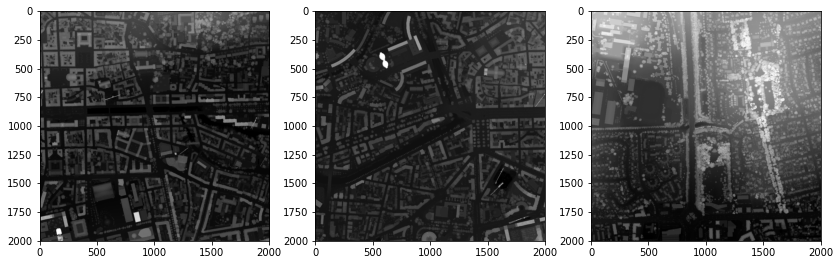

In [7]:
# Your turn!
#opening raster file
data_1=rio.open('/content/data/dsm_vox_50cm_tile_-11_0.tif')
data_1=data_1.read(1)
#opening raster file 2
data_2=rio.open('/content/data/dsm_vox_50cm_tile_-12_0.tif')
data_2=data_2.read(1)
#opening raster file 2
data_3=rio.open('/content/data/dsm_vox_50cm_tile_-7_1.tif')
data_3=data_3.read(1)

#subplotting images in 2D array
plt.figure(figsize=(14,10))
plt.subplot(131)
plt.imshow(data_1, cmap='gray')
plt.subplot(132)
plt.imshow(data_2, cmap='gray')
plt.subplot(133)
plt.imshow(data_3, cmap='gray')
plt.show()

For visualizing more details on the above satellite images, we can plot histogram for intensity level of the image and filter the details based on the area of interest.

## 2. Visualize flat zones in the DSM

- Find the values of the flat zones
    + Sort the unique values in a list (or an array) of levels
- Display some flat zones
    + Display the flatzones of  $i^{th}$  level

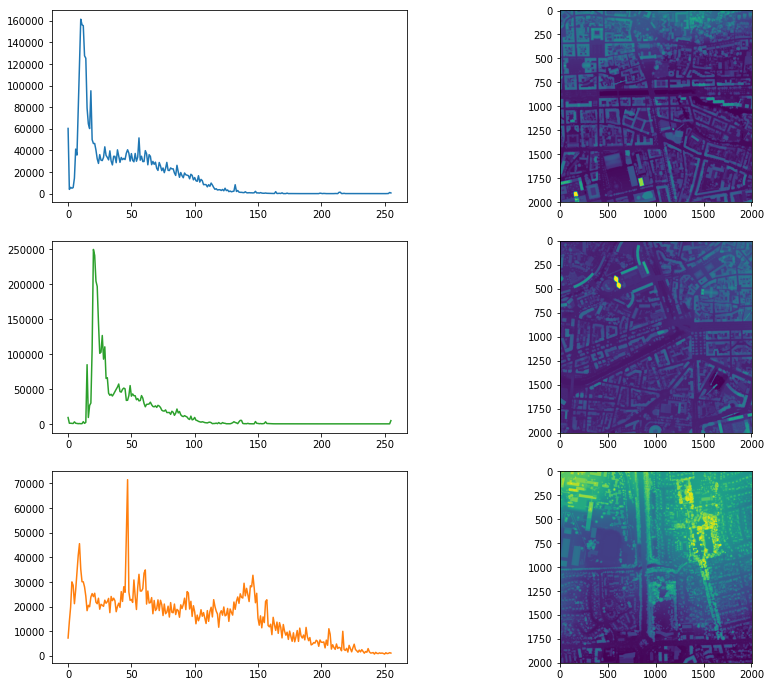

In [14]:
#finding unique values
uniq_1=np.sort(np.unique(data_1))
uniq_2=np.sort(np.unique(data_2))
uniq_3=np.sort(np.unique(data_3))

#creating a histogram of the image

hist_1, bin_edges = np.histogram(data_1, bins=256)

hist_2, bin_edges = np.histogram(data_2, bins=256)

hist_3, bin_edges = np.histogram(data_3, bins=256)

fig, axs = plt.subplots(3, 2,figsize=(14,12))
axs[0, 0].plot(hist_1)
axs[0, 1].imshow(data_1)
axs[1, 0].plot(hist_2, 'tab:green')
axs[1, 1].imshow(data_2)
axs[2, 0].plot(hist_3, 'tab:orange')
axs[2, 1].imshow(data_3)


Based on the definite peaks in the histogram, the flat land can be considered as low intensity points and thus can be sucessfully seprated. Though for first and second images we can detect the peak points that help us easily distinguish but the third image has ranges of peak points tha can make it difficult fro thresholding.



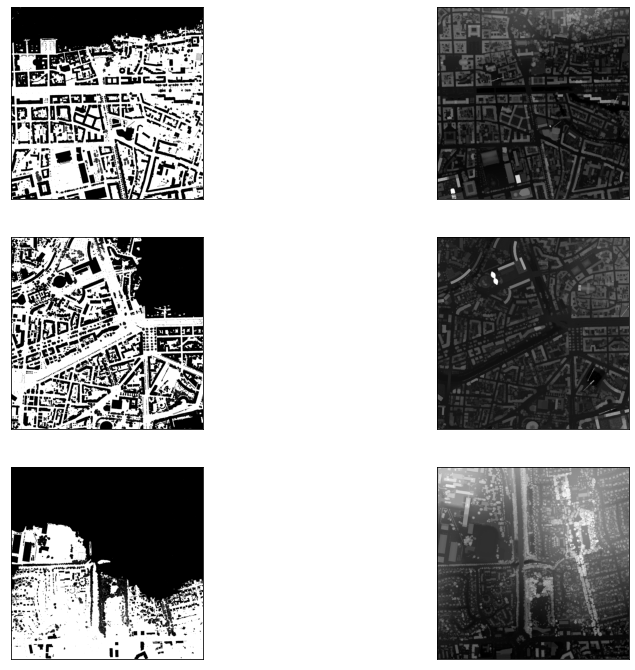

In [37]:
#thresholding to obtain flat regions
img_thres_1 = data_1 <= 36

img_thres_2 = data_2 <= 30

img_thres_3 = data_3 <= 40


fig, axs = plt.subplots(3, 2,figsize=(14,12))
axs[0, 0].imshow(img_thres_1, cmap="gray")
#axs[0, 0].plot.title("data_1 with threshold")
axs[0, 1].imshow(data_1, cmap="gray")
axs[1, 0].imshow(img_thres_2,cmap="gray")
#axs[1, 0].plt.title("data_2 with threshold")
axs[1, 1].imshow(data_2, cmap="gray")
axs[2, 0].imshow(img_thres_3,cmap="gray")
#axs[2, 0].plot.title("data_3 with threshold")
axs[2, 1].imshow(data_3, cmap="gray")

#remove ticks
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);


## 3. Create a max-tree of the DSM

Building a max-tree  🙂

Note: The max-tree is a hierarchical representation of an image that is the basis for a large family of morphological filters.

If we apply a threshold operation to an image, we obtain a binary image containing one or several connected components. If we apply a lower threshold, all the connected components from the higher threshold are contained in the connected components from the lower threshold. This naturally defines a hierarchy of nested components that can be represented by a tree. whenever a connected component A obtained by thresholding with threshold t1 is contained in a component B obtained by thresholding with threshold t1 < t2, we say that B is the parent of A. The resulting tree structure is called a component tree. 

In [40]:
# creation of the max-tree of an image
mt = sap.MaxTree(data_1)
mt

MaxTree{'adjacency': 4,
 'image.dtype': dtype('float64'),
 'image.shape': (2001, 2001),
 'image_hash': '6ebb69b8',
 'image_name': None,
 'num_nodes': 6144186}

The max tree created from data_1 has 6144186 nodes with a shape of (2001,2001)